# Loan Approval Classification - Group 3

## Problem Statement:
We are trying to help banks and financial institutions qualify people of various socioeconomic backgrounds for personal loans. The process of granting loans is a fundamental exercise of the financial services industry, however there are still many inefficiencies throughout the process. Our project aims to optimize decision-making speed and accuracy while maintaining compliance standards. In accomplishing this by leveraging machine learning technologies, we hope to provide a cost-effective method to more accurately identify individuals who will be approved for loans, as well as reduce bias within the loan approval process through the reduction of human intervention and reviewing of applicant information.

## 1. Dataset Description and Understanding
Our dataset comes from Kaggle and can be found [here](https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc/data). The following is a detailed description of each feature:
- **ID:** ID of the customer.

- **Age:** Age of the customer in years.

- **Experience:** Amount of work experience in years.

- **Income:** Amount of annual income (in thousands).

- **Zipcode:** Postal code of the city in which the client lives.

- **Family:** Number of family members.

- **CCAvg:** Average monthly spending with the credit card (in thousands).

- **Education:** Education level
 - 1 : Bachelor's degree
 - 2 : Master's degree
 - 3 : Advanced/Professional degree.

- **Mortgage:** Value of home mortgage, if any (in thousands).

- **Securities Account:** Does the customer have a securities account with the bank?

- **CD Account:** Does the customer have a certificate of deposit account (CD) with the bank?

- **Online:** Does the customer use the internet banking facilities?

- **CreditCard:** Does the customer use a credit card issued by the bank?

- **Personal Loan:** Did this customer accept the personal loan offered in the last campaign?


### Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

Reading in our data and check first the few rows to get an idea of what we are looking at.

In [6]:
df = pd.read_csv('data/bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


From the above information we can see that there are no missing values in any of the features as each one has 5000 values.

To improve understanding we will rename a couple of the features to remove periods and clearly mark our target variable. 

In [8]:
df.rename(columns={"ZIP.Code":"Zip", "Personal.Loan":"Loan_decision", "Securities.Account":"Securities_account", "CD.Account":"CD_account"}, inplace=True)

Next we will take a look at some of the statistics behind each feature.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Zip,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Loan_decision,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


From the above, we can see that Securities_account, CD_account, Online, and CreditCard all seem to already be binary columns that are represented as integers.

Taking a look at the correlation between all features we can see a few standout. Income, CD_account, and CCAvg seem to have strong correlations with the Loan_decision.

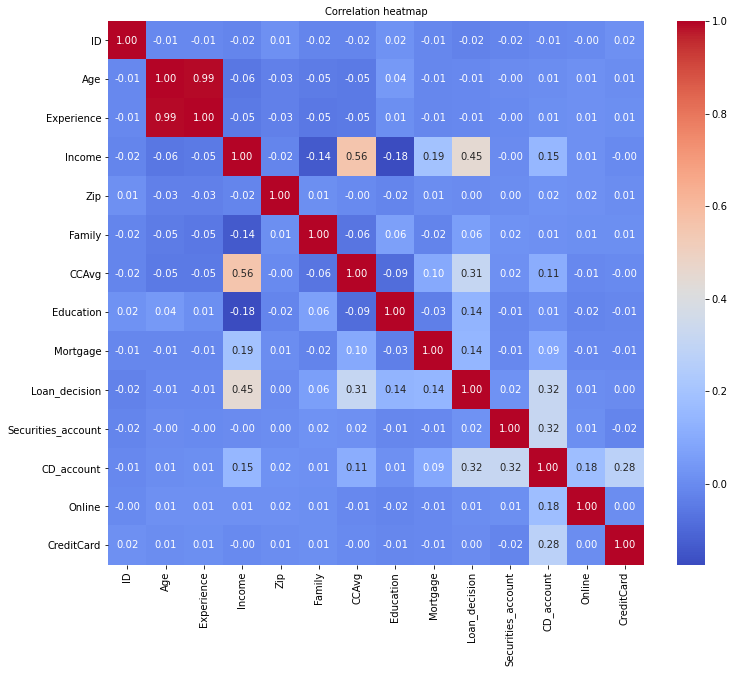

In [183]:
fig, ax = plt.subplots(figsize=(12,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
heatmap.set_title('Correlation heatmap' , fontdict={'fontsize':10})
plt.savefig('images/correlation_heatmap.png')

## 2. Exploratory Data Analysis and Data Processing
Now that we know a bit about the data, we can now move on to processing our data and preparing it for modeling.

### EDA

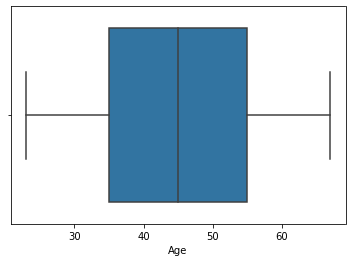

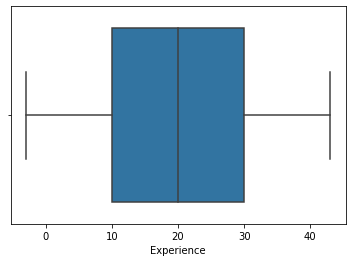

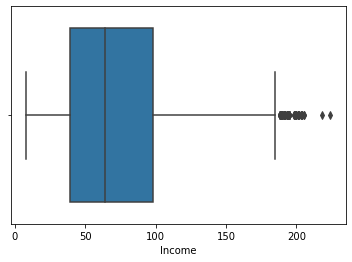

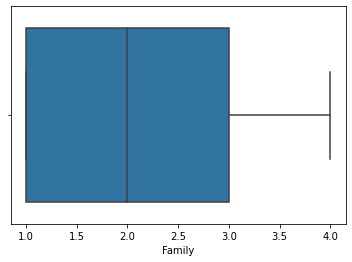

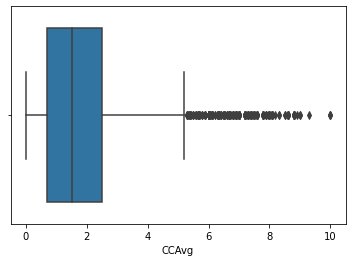

In [13]:
col_numeric = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg']] 

for col in col_numeric.columns:
    if df[col].dtype!= "object":
        sns.boxplot(x=df[col])
        plt.show()

If we strictly look at the numerical columns, we can see that the boxplots above tell us that both Income and CCAvg have a good number of outliers.

Below we can see the scatterplots of each of those two features and their correspondence to the loan decision.

<AxesSubplot:xlabel='Income', ylabel='Loan_decision'>

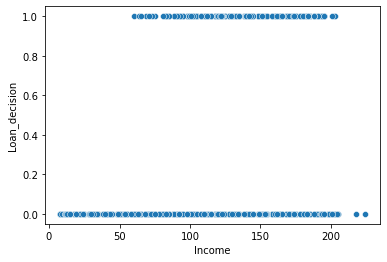

In [14]:
sns.scatterplot(data=df, x='Income', y='Loan_decision')

<AxesSubplot:xlabel='CCAvg', ylabel='Loan_decision'>

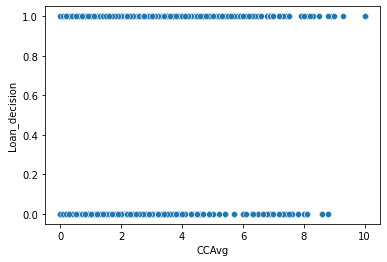

In [15]:
sns.scatterplot(data=df, x='CCAvg', y='Loan_decision')

In order to handle these outliers, there are two approaches we first thought we could take to replace the outlier values: using the **average** to replace values or the **median** to replace values.

In [16]:
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [17]:
df['Income'].median()

64.0

In [18]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
IQR = q3 - q1
outliers =  df['Income'][((df['Income']<(q1-1.5*IQR)) | (df['Income']>(q3+1.5*IQR)))]
print("number of outliers in Income: " + str(len(outliers)))

number of outliers in Income: 96


In [19]:
df['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [20]:
df['CCAvg'].median()

1.5

In [21]:
q1 = df['CCAvg'].quantile(0.25)
q3 = df['CCAvg'].quantile(0.75)
IQR = q3 - q1
outliers =  df['CCAvg'][((df['CCAvg']<(q1-1.5*IQR)) | (df['CCAvg']>(q3+1.5*IQR)))]
len(outliers)
print("number of outliers in CCAvg: " + str(len(outliers)))

number of outliers in CCAvg: 324


However, upon looking at both the average and median values we did not see any clear cut answer. So, we did some research and found that we could either use the log, cube root, or square root of a number to 'center' the data to get a more even distribution.
Below, those transformations and their distributions are plotted.

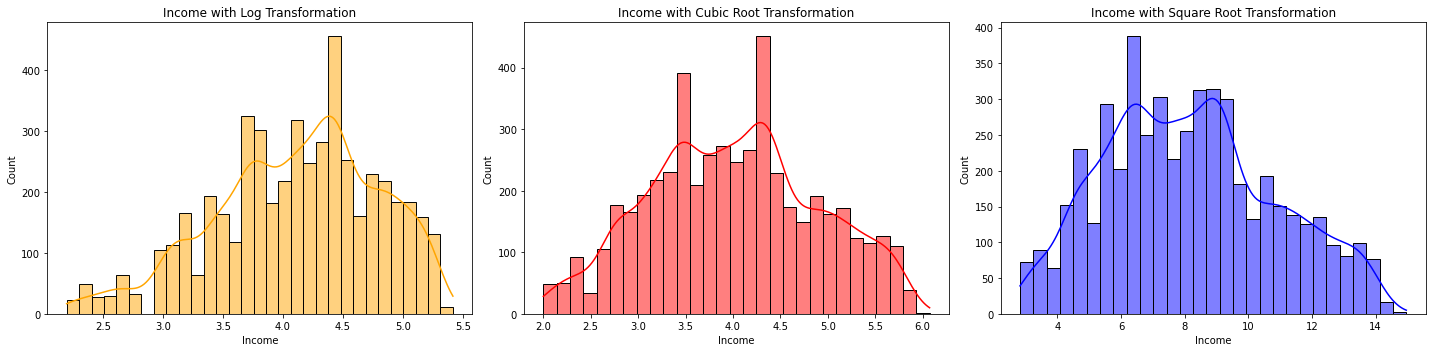

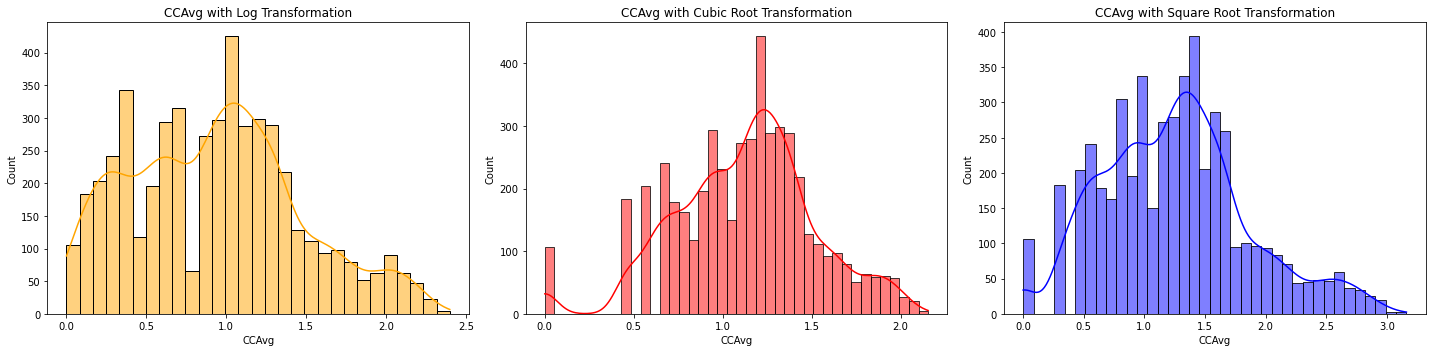

In [22]:
skewed_columns =['Income','CCAvg']

for col in skewed_columns:
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Log Transformation
    sns.histplot(np.log(df[col] + 1), color='orange', ax=axes[0],kde=True)
    axes[0].set_title(f'{col} with Log Transformation')

    # Cubic Root Transformation
    sns.histplot(np.cbrt(df[col]), color='red', ax=axes[1],kde=True)
    axes[1].set_title(f'{col} with Cubic Root Transformation')

    # Square Root Transformation
    sns.histplot(np.sqrt(df[col]), color='blue', ax=axes[2],kde=True)
    axes[2].set_title(f'{col} with Square Root Transformation')

    plt.tight_layout()
    plt.show()
    print("\n")

### Data Processing

It seems as though the cubic root would be the best decision for transforming both the features we are looking into. Although it is to be expected that the CCAvg feature will most likely still include some outliers.

In [23]:
df['Income'] = np.cbrt(df['Income'])
df['CCAvg'] = np.cbrt(df['CCAvg'])

In [24]:
df.head()

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Loan_decision,Securities_account,CD_account,Online,CreditCard
0,1,25,1,3.659306,91107,4,1.169607,1,0,0,1,0,0,0
1,2,45,19,3.239612,90089,3,1.144714,1,0,0,1,0,0,0
2,3,39,15,2.223980,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,4.641589,94112,1,1.392477,2,0,0,0,0,0,0
4,5,35,8,3.556893,91330,4,1.000000,2,0,0,0,0,0,1


In [25]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
IQR = q3 - q1
outliers =  df['Income'][((df['Income']<(q1-1.5*IQR)) | (df['Income']>(q3+1.5*IQR)))]
print("number of outliers in Income: " + str(len(outliers)))

number of outliers in Income: 0


In [26]:
q1 = df['CCAvg'].quantile(0.25)
q3 = df['CCAvg'].quantile(0.75)
IQR = q3 - q1
outliers =  df['CCAvg'][((df['CCAvg']<(q1-1.5*IQR)) | (df['CCAvg']>(q3+1.5*IQR)))]
len(outliers)
print("number of outliers in CCAvg: " + str(len(outliers)))

number of outliers in CCAvg: 122


As noted above, we still have some outliers in the CCAvg column but we managed to decrease it by roughly 2/3.

### Scaling Our Data
Next, it would be ideal to manipulate our data so it is all on the same scale. We will do this by utilizing sklearn's StandardScaler. Since there are a few columns that are binary (Loan_decision, Securities_account, CD_account, Online, and CreditCard) and couple that do not really have numeric value (ID and Zip) we will only transform the columns excluding the ones mentioned.

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for col in columns:
    df_scaled[col] = scaler.fit_transform(np.array(df_scaled[col]).reshape(-1,1))

In [29]:
df_scaled.head()

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Loan_decision,Securities_account,CD_account,Online,CreditCard
0,1,-1.774417,-1.666078,-0.390648,91107,1.397414,0.109343,-1.049078,-0.555524,0,1,0,0,0
1,2,-0.029524,-0.096330,-0.863640,90089,0.525991,0.045904,-1.049078,-0.555524,0,1,0,0,0
2,3,-0.552992,-0.445163,-2.008249,94720,-1.216855,-0.322893,-1.049078,-0.555524,0,0,0,0,0
3,4,-0.901970,-0.968413,0.716378,94112,-1.216855,0.677315,0.141703,-0.555524,0,0,0,0,0
4,5,-0.901970,-1.055621,-0.506066,91330,1.397414,-0.322893,0.141703,-0.555524,0,0,0,0,1


## 3. Modeling
Now that our data is processed and prepared, we can begin the modeling process. First, we will need to split our data into train and test data, utilizing the train_test_split module from sklearn.

In [110]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(['Loan_decision'], axis=1)
Y = df_scaled['Loan_decision']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [31]:
X_train.head()

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Securities_account,CD_account,Online,CreditCard
1840,1841,0.842923,0.426919,-1.309641,93106,1.397414,-0.993630,1.332484,0.309735,0,0,0,0
2115,2116,1.017412,0.950169,-1.012830,95070,0.525991,-0.020420,-1.049078,-0.555524,0,0,0,0
4437,4438,1.540880,1.560626,-0.030290,92507,-0.345432,0.045904,-1.049078,-0.555524,0,0,1,0
1146,1147,-1.250949,-1.142829,0.152013,90034,-1.216855,-1.688459,-1.049078,0.211410,1,0,0,0
2486,2487,1.366391,1.386210,1.194458,92717,-1.216855,-0.089983,-1.049078,1.971426,0,0,0,0


### Logistic Regression
The first model we chose to implement in this classification problem was logistic regression with some basic parameters to start.

In [32]:
from sklearn.linear_model import LogisticRegression

In [113]:
logreg_model_1=LogisticRegression(penalty='l2', C=1.0,solver='liblinear', max_iter=400, random_state=42)

In [114]:
logreg_model_1.fit(X_train,y_train)

LogisticRegression(max_iter=400, random_state=42, solver='liblinear')

In [124]:
y_pred_logreg_model_1=logreg_model_1.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [125]:
logreg_model_1_accuracy=accuracy_score(y_test,y_pred_logreg_model_1)
accuracy

0.8953333333333333

In [126]:
logreg_model_1_conf_matrix=confusion_matrix(y_test,y_pred_logreg_model_1)
logreg_model_1_conf_matrix

array([[1343,    0],
       [ 157,    0]], dtype=int64)

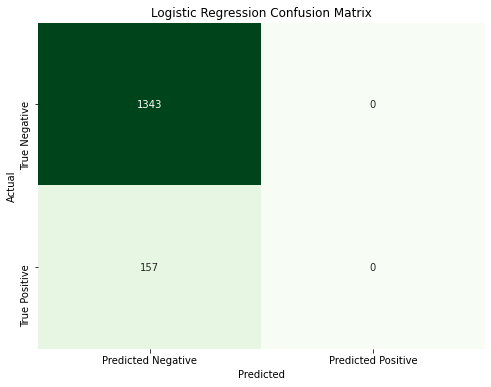

In [184]:
plt.figure(figsize=(8,6))
sns.heatmap(logreg_model_1_conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('images/logreg_base_conf_matrix.png')

In [129]:
logreg_report=classification_report(y_test,y_pred_logreg_model_1)

In [130]:
print(logreg_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      1343
           1       0.00      0.00      0.00       157

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.90      0.85      1500



As seen through the above process, this base logistic regression model was really only predicting negative values. We can attribute this to the fact that the target variable is heavily biased to a negative result.

In search of better results we decided to utilize grid search to tune our parameters and obtain a better result for our model before addressing the imbalance.

In [42]:
from sklearn.model_selection import GridSearchCV,KFold

In [43]:
num_folds=5
kf=KFold(n_splits=num_folds,shuffle=True,random_state=42)

In [122]:
params={
    'penalty': ['l1','l2'],
    'C': [0.0001,0.001,0.01,0.1,1,10,100],
    'solver': ['liblinear','lbfgs','sag','newton-cg'],
    'max_iter': [100,200,300,400]
}

logreg_grid_search=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')

In [123]:
logreg_grid_search.fit(X_train,y_train)

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\chankey\AppDa

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\L

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppDa

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\skle

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.war

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppDa

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppDa

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\L

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\L

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\L

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=400, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg']},
             scoring='accuracy')

In [131]:
logreg_best_params=grid_search.best_params_
logreg_best_params

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [132]:
logreg_best_model=grid_search.best_estimator_
logreg_best_model

LogisticRegression(C=10, random_state=42, solver='newton-cg')

In [133]:
y_pred_logreg_best_model=logreg_best_model.predict(X_test)

In [134]:
accuracy=accuracy_score(y_test,y_pred_logreg_best_model)
accuracy

0.8973333333333333

In [136]:
logreg_best_model_conf_matrix=confusion_matrix(y_test,y_pred_logreg_best_model)
logreg_best_model_conf_matrix

array([[1207,  136],
       [  18,  139]], dtype=int64)

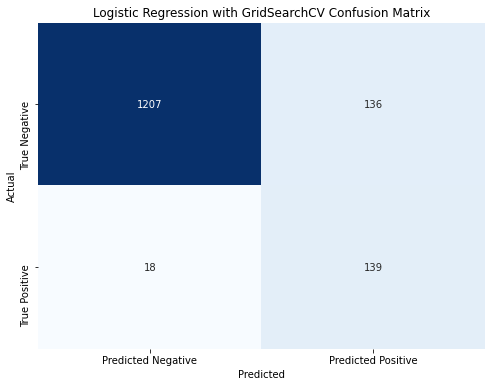

In [185]:
plt.figure(figsize=(8,6))
sns.heatmap(logreg_best_model_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with GridSearchCV Confusion Matrix')
plt.savefig('images/logreg__grid_conf_matrix.png')

In [138]:
logreg_best_model_report=classification_report(y_test,y_pred_logreg_best_model)

In [139]:
print(logreg_best_model_report)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1343
           1       0.51      0.89      0.64       157

    accuracy                           0.90      1500
   macro avg       0.75      0.89      0.79      1500
weighted avg       0.94      0.90      0.91      1500



With grid search we see a better result with the model actually predicting some data as positive, however it seems we can still improve our metrics.

Next, we will utilize SMOTE to resample our data and more evenly distribute our training data.

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

In [55]:
print(sum(y_train==0))
print(sum(y_train==1))

3177
323


In [56]:
print(sum(y_train_upsampled==0))
print(sum(y_train_upsampled==1))

3177
3177


As seen above, after upsampling, our data is evenly distributed.

In [140]:
logreg_upsamp_model=LogisticRegression(penalty='l2', C=1.0,solver='liblinear', max_iter=400, random_state=42)
logreg_upsamp_model.fit(X_train_upsampled,y_train_upsampled)
y_pred_logreg_upsamp=model.predict(X_test)

In [141]:
logreg_upsamp_conf_matrix=confusion_matrix(y_test,y_pred_logreg_upsamp)
logreg_upsamp_conf_matrix

array([[1198,  145],
       [  19,  138]], dtype=int64)

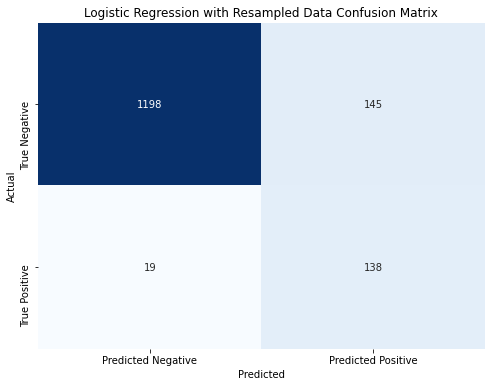

In [186]:
plt.figure(figsize=(8,6))
sns.heatmap(logreg_upsamp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with Resampled Data Confusion Matrix')
plt.savefig('images/logreg_upsamp_conf_matrix.png')

Even with upsampling we get similar results to the previous model we ran that utilized grid search.

Now we can try combining upsampling and grid search and see if we get any improvementst.

In [144]:
model_upsampled = LogisticRegression(random_state=42)

In [145]:
params={
    'penalty': ['l1','l2'],
    'C': [0.0001,0.001,0.01,0.1,1,10,100],
    'solver': ['liblinear','lbfgs','sag','newton-cg'],
    'max_iter': [100,200,300,400,500,600,700,800]
}

logreg_upsamp_grid_model=GridSearchCV(estimator=model_upsampled,param_grid=params,cv=kf,scoring='f1_macro', n_jobs=-1)
logreg_upsamp_grid_model.fit(X_train_upsampled,y_train_upsampled)

C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\chankey\AppData\Local\a

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg']},
             scoring='f1_macro')

In [146]:
best_params=grid_search.best_params_
best_params

{'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [148]:
logreg_upsamp_best_model=grid_search.best_estimator_
logreg_upsamp_best_model

LogisticRegression(C=10, random_state=42, solver='newton-cg')

In [149]:
y_test_upsampled_gridsearch = logreg_upsamp_best_model.predict(X_test)

In [150]:
logreg_upsamp_grid_conf_matrix=confusion_matrix(y_test,y_test_upsampled_gridsearch)
logreg_upsamp_grid_conf_matrix

array([[1207,  136],
       [  18,  139]], dtype=int64)

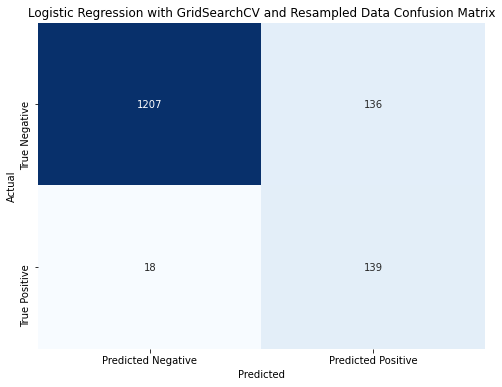

In [187]:
plt.figure(figsize=(8,6))
sns.heatmap(logreg_upsamp_grid_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with GridSearchCV and Resampled Data Confusion Matrix')
plt.savefig('images/logreg_upsamp_grid_conf_matrix.png')

In [153]:
logreg_upsamp_grid_report = classification_report(y_test,y_test_upsampled_gridsearch)
print(logreg_upsamp_grid_report)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1343
           1       0.51      0.89      0.64       157

    accuracy                           0.90      1500
   macro avg       0.75      0.89      0.79      1500
weighted avg       0.94      0.90      0.91      1500



As seen above, we are struggling to get any large improvements in any category of metric. Now that we have exhausted most methods we could use to improve our logistic regression model, we will move on to other ensemble methods.

### Decision Tree Classifier

Our next model will be the decision tree classifier. Since we know our dataset to be unbalanced we will start off with immediately upsampling our data. We will first try a base model for the decision tree with basic parameters.

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
smote = SMOTE(sampling_strategy='auto',n_jobs=-1,random_state=42)
X_train_upsampled_DT, y_train_upsampled_DT = smote.fit_resample(X_train, y_train)

In [155]:
X_train,X_test,y_train,y_test=train_test_split(X_train_upsampled_DT,y_train_upsampled_DT,test_size=0.3,random_state=42)

In [156]:
X_train_upsampled_DT.shape

(6354, 13)

In [159]:
dt_model=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',random_state=42,class_weight='balanced')

In [160]:
dt_model.fit(X_train,y_train)
y_pred_test_DT=dt_model.predict(X_test)

In [161]:
dt_conf_matrix=confusion_matrix(y_test,y_pred_test_DT)
dt_conf_matrix

array([[918,  55],
       [ 78, 856]], dtype=int64)

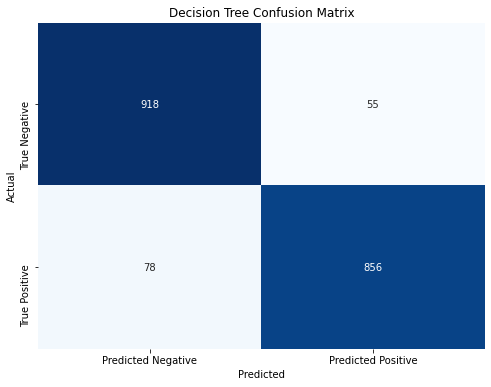

In [188]:
plt.figure(figsize=(8,6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.savefig('images/dt_base_conf_matrix.png')

In [163]:
dt_report=classification_report(y_test,y_pred_test_DT)
print(dt_report)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       973
           1       0.94      0.92      0.93       934

    accuracy                           0.93      1907
   macro avg       0.93      0.93      0.93      1907
weighted avg       0.93      0.93      0.93      1907



As seen from our scores above we have improved compared to our numerous logistic regression models! Now we will utilize grid search to tune our parameters.

In [164]:
param_grid={
    'max_depth': [3,5,7,9,10,None],
    'min_samples_split': [2,5,7,10],
    'min_samples_leaf': [1,2,4,5],
    'max_features': ['sqrt','log2',None],
    'criterion': ['gini','entropy'],
    'class_weight': [None, 'balanced']
}

clf_param_grid=DecisionTreeClassifier(random_state=42)
grid_search_DT=GridSearchCV(estimator=clf_param_grid,param_grid=param_grid,cv=kf,scoring='accuracy',n_jobs=-1)

In [165]:
grid_search_DT.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='accuracy')

In [166]:
best_params=grid_search_DT.best_params_
best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [167]:
best_score=grid_search_DT.best_score_
best_score

0.9797601142553811

In [168]:
dt_best_model=grid_search_DT.best_estimator_
dt_best_model

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [169]:
y_pred_grid_DT=dt_best_model.predict(X_test)

In [84]:
acc=accuracy_score(y_test,y_pred_grid_DT)
acc

0.9816465652857892

In [171]:
dt_best_model_conf_mat=confusion_matrix(y_test,y_pred_grid_DT)
dt_best_model_conf_mat

array([[961,  12],
       [ 23, 911]], dtype=int64)

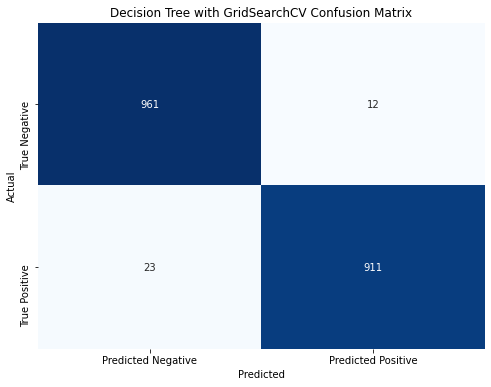

In [189]:
plt.figure(figsize=(8,6))
sns.heatmap(dt_best_model_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree with GridSearchCV Confusion Matrix')
plt.savefig('images/dt_grid_conf_matrix.png')

In [174]:
dt_best_model_report=classification_report(y_test,y_pred_grid_DT)
print(dt_best_model_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       973
           1       0.99      0.98      0.98       934

    accuracy                           0.98      1907
   macro avg       0.98      0.98      0.98      1907
weighted avg       0.98      0.98      0.98      1907



These results look pretty favorable. Consistent scores across the board of metrics and relatively high scores meaning our model should perform well with new data.

Another thing we can look at as our model improves metric scores is feature importance. The graph below displays the relative importance of each feature on the loan decision classification. As we can see, income is a very important feature when it comes to this decision, which makes sense within our problem. Education and family are also quite important and play a larger role in the load decision.

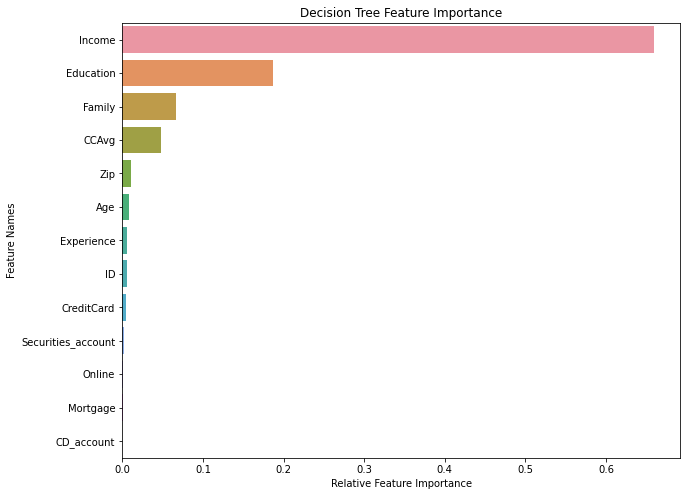

In [190]:
features = np.array(X_train.columns)
importances = np.array(dt_best_model.feature_importances_)
fi_data = {'feature_names':features, 'feature_importance':importances}
fi_df = pd.DataFrame(fi_data)
fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
plt.title('Decision Tree Feature Importance')
plt.xlabel('Relative Feature Importance')
plt.ylabel('Feature Names')
plt.savefig('images/dt_feature_importance.png')

### Random Forest Classifier
Next, we will implement the random forest classifier to see if we can get any final improvements wiht our classification. Since the previous two models gave use the best results when utilizing grid search, we thought it appropriate to start there with this model.

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
param_grid={
    'n_estimators': [50,100,150,200,300],
    'max_depth': [3,5,7,9,10,None],
    'min_samples_split': [2,5,7,10],
    'min_samples_leaf': [1,2,4,5],
    'max_features': ['sqrt','log2'],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini','entropy']
    
}
clf_param_grid=RandomForestClassifier(random_state=42)
grid_search_RF=GridSearchCV(estimator=clf_param_grid,param_grid=param_grid,cv=kf,scoring='accuracy',n_jobs=-1)


In [90]:
grid_search_RF.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='accuracy')

In [91]:
best_params=grid_search_RF.best_params_
best_params

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [92]:
best_score=grid_search_RF.best_score_
best_score

0.9874073886831563

In [177]:
rf_best_model=grid_search_RF.best_estimator_
rf_best_model

RandomForestClassifier(max_features='sqrt', random_state=42)

In [178]:
y_pred_grid_RF=rf_best_model.predict(X_test)

In [95]:
acc=accuracy_score(y_test,y_pred_grid_RF)
acc

0.9884635553224961

In [179]:
rf_conf_mat=confusion_matrix(y_test,y_pred_grid_RF)
rf_conf_mat

array([[965,   8],
       [ 14, 920]], dtype=int64)

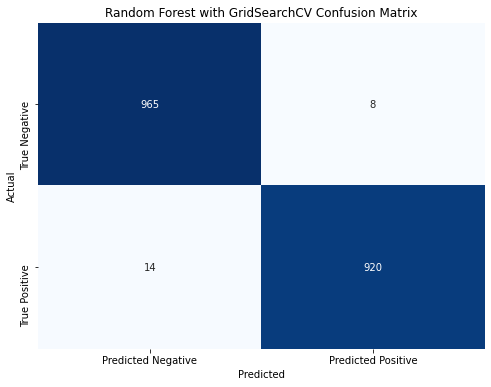

In [191]:
plt.figure(figsize=(8,6))
sns.heatmap(rf_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with GridSearchCV Confusion Matrix')
plt.savefig('images/rf_grid_conf_matrix.png')

In [181]:
rf_report=classification_report(y_test,y_pred_grid_RF)
print(rf_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       973
           1       0.99      0.99      0.99       934

    accuracy                           0.99      1907
   macro avg       0.99      0.99      0.99      1907
weighted avg       0.99      0.99      0.99      1907



And there we go, our model is consistent across the board and high scoring. One thing to be cautious about with the improvement in scores like this is overfitting. In order to test if our model was overfit we did adjust our train test split from 20% test size to 30% test size and received similar results in both instances. Wether this means our model is overfit is still to be determined once presented with new data, but with little change after the adjustment to test size, we can assume the model will be fit well.

If we again take a look at feature importance for the random classifier, we can see Income is at the top of the board. Interestingly, CCAvg took over the second spot which makes sense as well. This random forest model seems to be the best performing and make the most sense with feature importance.

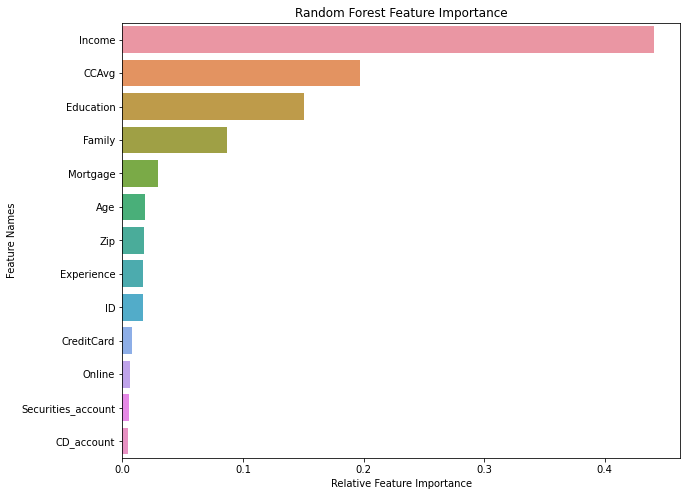

In [192]:
features = np.array(X_train.columns)
importances = np.array(rf_best_model.feature_importances_)
fi_data = {'feature_names':features, 'feature_importance':importances}
fi_df = pd.DataFrame(fi_data)
fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
plt.title('Random Forest Feature Importance')
plt.xlabel('Relative Feature Importance')
plt.ylabel('Feature Names')
plt.savefig('images/rf_feature_importance.png')